# Analizando a la competencia de Janssen

In [1]:
library(dplyr)
library(ggplot2)
library(ggthemes)
library(extrafont)
library(skimr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ggthemes' was built under R version 3.6.3"Warning message:
"package 'extrafont' was built under R version 3.6.2"Registering fonts with R
Warning message:
"package 'skimr' was built under R version 3.6.3"

In [2]:
datos = read.csv('clean_datos Trialing.csv',stringsAsFactors = FALSE,na.strings = "")
head(datos)

Trial_Id,Acronym,Sponsor,Hospital,Ciudad
0,ALINA,Hoffmann-La Roche,Hospital Universitario 12 de Octubre,Madrid
154,TRIDENT-1,"Turning Point Therapeutics, Inc.",Clinica Universidad de Navarra,Pamplona
172,XL184-021,Exelixis,Instituto Oncológico Rosell,Barcelona
945,1948-CL-0101,Astellas,Hospital de La Santa Creu i Sant Pau,Barcelona
915,NADIM-ADJUVANT,Grupo Español De Cáncer De Pulmón,Hospital Materno-Infantil del H.U. de Jaen,Jaén
908,ZEAL-1L,Glaxosmithkline,Clinica Universidad de Navarra,Pamplona


In [3]:
skim(datos)

-- Data Summary ------------------------
                           Values
Name                       datos 
Number of rows             3591  
Number of columns          5     
_______________________          
Column type frequency:           
  character                4     
  numeric                  1     
________________________         
Group variables            None  

-- Variable type: character ----------------------------------------------------
# A tibble: 4 x 8
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
* <chr>             <int>         <dbl> <int> <int> <int>    <int>      <int>
1 Acronym               2         0.999     4    35     0      227          0
2 Sponsor              70         0.981     5    49     0       76          0
3 Hospital             11         0.997    16    73     0       87          0
4 Ciudad               11         0.997     4    26     0       56          0

-- Variable type: numeric ------------------------

In [4]:
unique(datos$Sponsor)

[1] "Hoffmann-La Roche"                                
 [2] "Turning Point Therapeutics, Inc."                 
 [3] "Exelixis"                                         
 [4] "Astellas"                                         
 [5] "Grupo Español De Cáncer De Pulmón"                
 [6] "Glaxosmithkline"                                  
 [7] "Aileron Therapeutics, Inc."                       
 [8] "Astrazeneca"                                      
 [9] "Genmab"                                           
[10] "Novartis Pharmaceuticals"                         
[11] "Loxo Oncology, Inc."                              
[12] "Iovance Biotherapeutics, Inc."                    
[13] "Instituto Oncológico Dr Rosell"                   
[14] "Checkpoint Therapeutics, Inc."                    
[15] "Beigene"                                          
[16] "Takeda"                                           
[17] "Abbvie"                                           
[18] "Merck Sharp & Dohme Corp."                        
[19] "Janssen"                                          
[20] "European Thoracic Oncology Platform"              
[21] "Tesaro, Inc."                                     
[22] "Cellestia Biotech Ag"                             
[23] "Epizyme, Inc."                                    
[24] "Sanofi"                                           
[25] "Solti Breast Cancer Research Group"               
[26] "Adaptimmune"                                      
[27] "Amgen"                                            
[28] "Medsir"                                           
[29] "Emd Serono Research & Development Institute, Inc."
[30] "Daiichi Sankyo, Inc."                             
[31] "Nektar Therapeutics"                              
[32] "Seagen Inc."                                      
[33] "Incyte Corporation"                               
[34] "Puma Biotechnology, Inc."                         
[35] NA                                                 
[36] "Immutep S.A.S."                                   
[37] "Bristol-Myers Squibb"                             
[38] "Eortc"                                            
[39] "Celgene"                                          
[40] "Medimmune Llc"                                    
[41] "Fundacion Oncosur"                                
[42] "Mirati Therapeutics Inc."                         
[43] "Millennium Pharmaceuticals, Inc."                 
[44] "Jiangsu Hengrui"                                  
[45] "Pfizer"                                           
[46] "Bayer"                                            
[47] "Sotio A.S."                                       
[48] "Macrogenics"                                      
[49] "Biontech Se"                                      
[50] "Debiopharm International Sa"                      
[51] "Pharmamar"                                        
[52] "Ability Pharmaceuticals Sl"                       
[53] "Boehringer Ingelheim"                             
[54] "Nouscom Srl"                                      
[55] "Novocure Ltd."                                    
[56] "Verastem, Inc."                                   
[57] "Fundación De Investigación Hm"                    
[58] "Apollomics Inc."                                  
[59] "Institute Of Cancer Research, United Kingdom"     
[60] "Replimune Inc."                                   
[61] "Affimed Gmbh"                                     
[62] "Dragonfly Therapeutics"                           
[63] "Peptomyc S.L."                                    
[64] "Bicycle Tx Limited"                               
[65] "Genentech, Inc."                                  
[66] "Institut De Recherches Internationales Servier"   
[67] "Bergenbio Asa"                                    
[68] "University Of Cologne"                            
[69] "Ribon Therapeutics, Inc."                         
[70] "Cytomx Therapeutics"                              
[71] "Actua

In [5]:
Janssen_datos <- datos  %>% filter(Sponsor=="Janssen")
resultados_Janssen <- data.frame(table(Janssen_datos$Acronym))
colnames(resultados_Janssen)<-c('Ensayo','N_total')

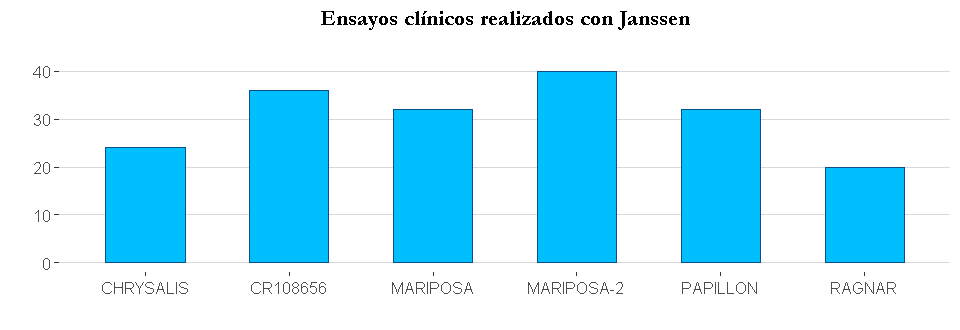

In [6]:
options(repr.plot.width=8,repr.plot.height=2.75)
ggplot(resultados_Janssen) + geom_bar(aes(x=Ensayo,y=N_total),stat = 'identity',fill= 'deepskyblue',col='dodgerblue4',width=.55) +
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'Garamond',size=13)) +
labs(title='Ensayos clínicos realizados con Janssen\n',x='',y="") + theme_hc()

In [7]:
hospitales_Janssen <- unique(Janssen_datos$Hospital)

In [8]:
paste("Total hospitales:",length(hospitales_Janssen))
for(hospital in hospitales_Janssen){print(hospital)}

[1] "Total hospitales: 23"

[1] "Instituto Oncológico Rosell"
[1] "Hospital Universitario Puerta de Hierro Majadahonda"
[1] "Complexo Hospitalario Universitario A Coruña"
[1] "Hospital Universitario Fundacion Jimenez Diaz"
[1] "Hospital Universitario Ramon Y Cajal"
[1] "Hospital Universitario Virgen del Rocio"
[1] "Hospital Clinic de Barcelona"
[1] "ICO (Institut Catala D'Oncologia) - Hospital Germans Trias i Pujol"
[1] "Hospital Universitario 12 de Octubre"
[1] "Hospital Universitario Regional de Malaga"
[1] "Hospital Universitario La Paz"
[1] "Hospital Universitari Vall D'Hebron"
[1] "Hospital Universitario Hm Sanchinarro"
[1] "Clinica Universidad de Navarra"
[1] "ICO (Institut Catala D'Oncologia) - Hospital Duran I Reynals"
[1] "Consorcio Hospital General Universitario de Valencia"
[1] "Hospital General Universitario Gregorio Marañon"
[1] "Hospital Universitario de Burgos - Complejo Asistencial Univer. de Burgos"
[1] "Hospital de La Santa Creu i Sant Pau"
[1] "Hospital Clinico Universitario Lozano Blesa"
[1] "

**Chequeando a la competencia**

In [9]:
for (hosp in hospitales_Janssen){datos_competencia <- datos %>% filter(Hospital==hosp)
                                 Janssen_competencia <- data.frame(table(datos_competencia$Sponsor))
                                 colnames(Janssen_competencia)<- c("Empresa","Nº")
                                 options(repr.plot.width=6,repr.plot.height=6)
                                 #barchart
                                 title_bar <- paste("Intervenciones de empresas junto a Jansen\nen",hosp)
                                 ggplot(data=Janssen_competencia) + 
                                 geom_bar(aes(x=Empresa,y=Nº),stat='identity',fill='tan4',width=0.65) + 
                                 scale_y_continuous(breaks=seq(5,25,5)) + coord_flip() + 
                                 ggtitle(title_bar) + theme_fivethirtyeight(base_size = 8)+
                                 ggsave(paste(hosp,"bar.png",sep="_"))
                                 #piechart
                                 dato_janssen <- Janssen_competencia$Nº[which(Janssen_competencia$Empresa=="Janssen")[1]]
                                 dato_competencia <- sum(Janssen_competencia$Nº)-dato_janssen
                                 janssen_porc <- round(dato_janssen*100/(dato_janssen+dato_competencia))
                                 Resumen_Hospital <- data.frame(Resumen=c("Janssen","Competencia"),Total=c(dato_janssen,dato_competencia))
                                 title_pie<-paste("Resumen de intervenciones de empresas en\n",hosp)
                                 options(repr.plot.width=6,repr.plot.height=3)
                                 ggplot(Resumen_Hospital) + geom_bar(aes(x="",y=Total,fill=Resumen),col='white',stat = "identity") +
                                 coord_polar(theta="y",start=0) + theme_void() + ggtitle(title_pie) + 
                                 theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'Garamond',size=13),
                                 plot.margin = margin(1,1,1,1, "cm"),text=element_text(size=12,family='MV Boli')) +
                                 geom_text(aes(x=1.15,y = dato_janssen/2 , label = paste(janssen_porc,"%")), col='white',size=4,fontface =2.5,family='Calibri') +
                                 scale_color_manual(values=c("palevioletred","lightskyblue2")) + theme(legend.title=element_blank())+
                                 ggsave(paste(hosp,"pie.png",sep="_"))}

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 i